<a href="https://colab.research.google.com/github/Bira0/GroupB/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



#Getting the Data
sourced from kaggle

In [1]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Load the dataset
csv_path = os.path.join(path, "creditcard.csv")
credB = pd.read_csv(csv_path)

credB

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Exploration

Dataset General Information

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

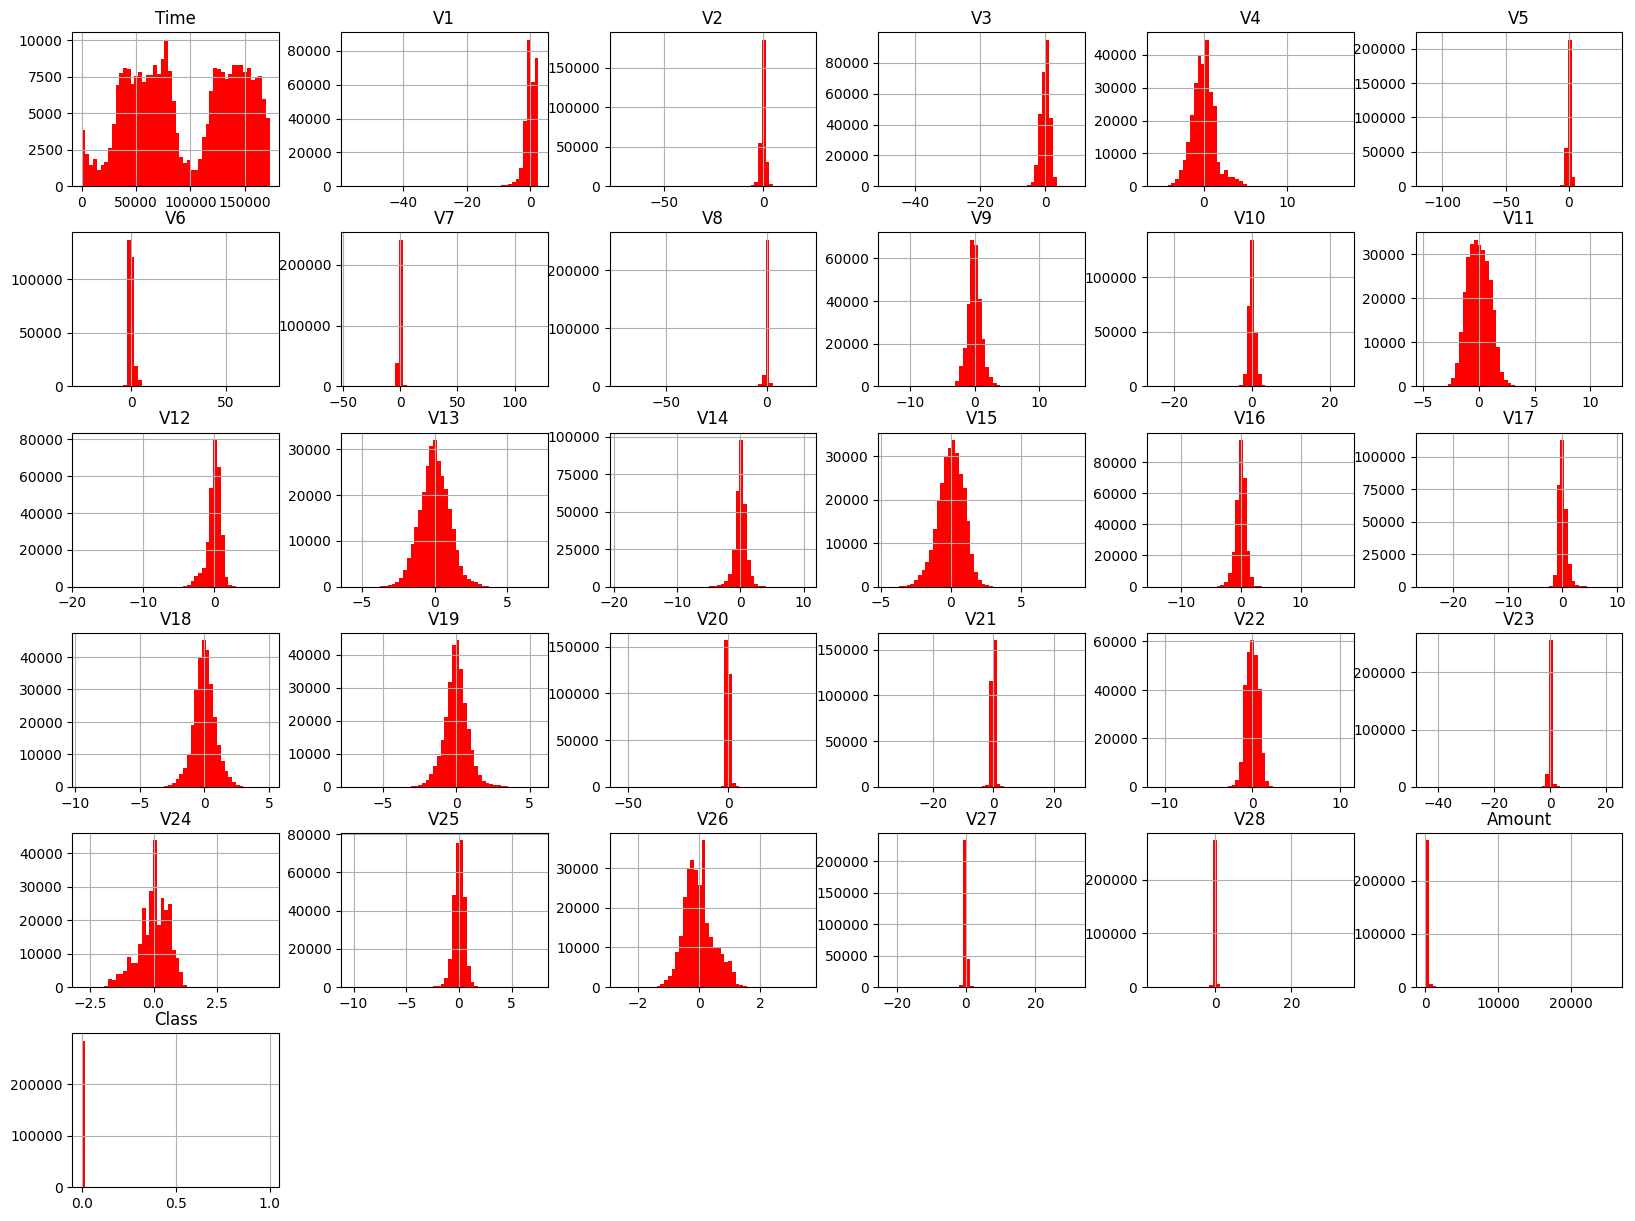

In [3]:
credB.hist( color='red', label='Fraud', bins=50, figsize=(20,15))

In [4]:
credB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
float_col = credB.select_dtypes(include=['float64']).columns
credB[float_col] = credB[float_col].astype('float32')
credB['Class'] = credB['Class'].astype('int32')

In [6]:
credB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

Summary statistics

In [7]:
credB.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47487.195312,1.958611e+00,1.651183,1.516203e+00,1.415832e+00,1.380180e+00,1.332214e+00,1.237020e+00,1.194202e+00,1.098575e+00,...,7.344701e-01,7.256873e-01,6.244100e-01,6.056016e-01,5.212620e-01,4.822155e-01,4.035722e-01,3.300574e-01,250.071564,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


See if NULL values exist

In [8]:
null_values = credB.isnull().sum()
null_values[null_values > 0]

,0


# Preprocessing

Splitting the data

In [9]:
from sklearn.model_selection import train_test_split
X = credB.drop('Class', axis=1)
y = credB['Class']



*   Since 'V1 - V28' had PCA done on them
There's no sense in scaling them.

*   Using boxplot on 'Amount', 'Time' to identify if they have any outliers, to choose which scaler to use on them.


Feature Engineering

Taking the log1p of 'Amount ' because of it's large values and to reduce the skewness

In [10]:
X['LogAmount'] = np.log1p(X['Amount'])
X = X.drop('Amount', axis=1)

Creating feature 'Hour' to move away from 'Time' cont values 0-172k
and capture time of day patterns of fraud.

In [11]:
X['Hour'] = (X['Time'] // 3600) % 24
X = X.drop('Time', axis=1)

In [12]:
# credB[['Amount', 'Time']].plot(kind='box')


*  Time has no outliers, using MinMaxScaler next.
*   Amount has a ton of outliers, using StandardScaler next.




In [13]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# X[['Time']] = mms.fit_transform(X[['Time']])
# X[['Time']].plot(kind='box')

Scaling Amount using RobustScaler

In [14]:
# # from sklearn.preprocessing import RobustScaler
# # rs = RobustScaler()
# # X[['Amount']] = rs.fit_transform(X[['Amount']])

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X[['Amount']] = ss.fit_transform(X[['Amount']])
# X[['Amount']].plot(kind='box')

<Axes: >

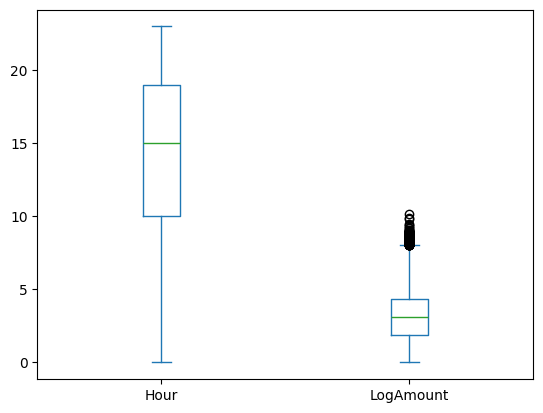

In [15]:
X[['Hour', 'LogAmount']].plot(kind='box')

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler
#fit StandardScaler on hour, RobustScaler on logamount do it

ss = StandardScaler()
rs = RobustScaler()

X['Hour'] = rs.fit_transform(X[['Hour']])
X['LogAmount'] = rs.fit_transform(X[['LogAmount']])


<Axes: >

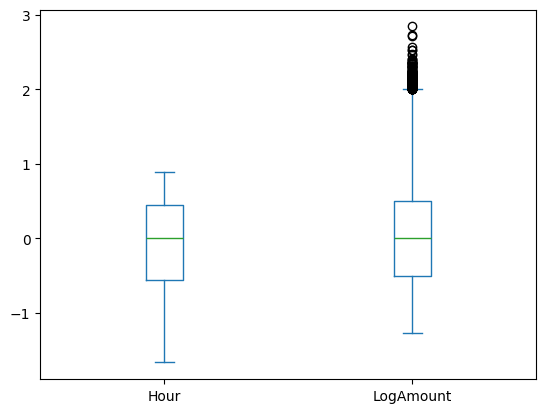

In [17]:
X[['Hour', 'LogAmount']].plot(kind='box')

In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
sum_variance = np.cumsum(pca.explained_variance_ratio_)

count = 1
for i in sum_variance:
  if i <= 0.95:
    count += 1
  else:
    break

print(count) #n_comp to use



24


Using np.cumsum(pca.explained_variance_ratio_)
Gave us an array with the same size as the features, that returned the variance comulative variance of each component

In [19]:
X.shape

(284807, 30)

In [20]:
sum_variance

array([0.12156516, 0.21128643, 0.28406233, 0.34752208, 0.40915063,
       0.46564394, 0.51420325, 0.5593757 , 0.5988547 , 0.63638455,
       0.671224  , 0.70403475, 0.735433  , 0.76474   , 0.7914771 ,
       0.81597364, 0.83886397, 0.8611331 , 0.8821156 , 0.9013911 ,
       0.9186033 , 0.9353014 , 0.94767004, 0.9592863 , 0.9679064 ,
       0.9764805 , 0.98414797, 0.9914496 , 0.9965529 , 1.0000001 ],
      dtype=float32)

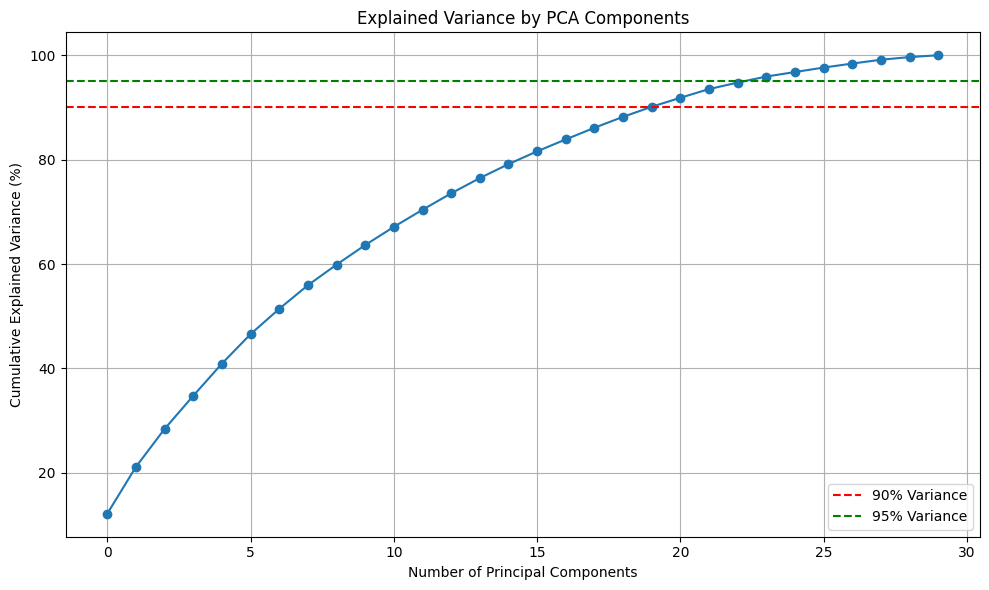

In [21]:
plt.figure(figsize=(10, 6))
plt.plot((sum_variance)*100, marker='o')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Applying 'Count' or the sweet spot of number of components using PCA on the dataset

In [22]:
pca_90 = PCA(n_components=count)
X_pca = pca_90.fit_transform(X)

X_pca.shape

(284807, 24)

Dimensions getting reduced to 24

<ipython-input-23-b4dffcd663c1>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', alpha=0.15)


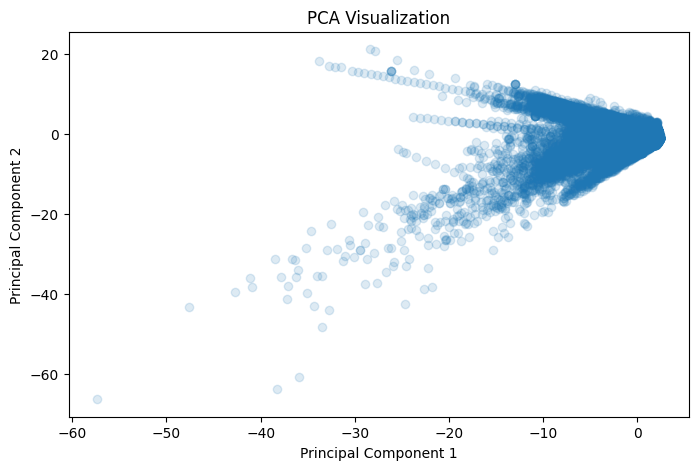

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', alpha=0.15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# TSNE


In [24]:
import numpy as np
from sklearn.manifold import TSNE

np.random.seed(42)
sample_idx = np.random.choice(X_pca.shape[0], size=5000, replace=False, )
X_sample = X_pca[sample_idx]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)


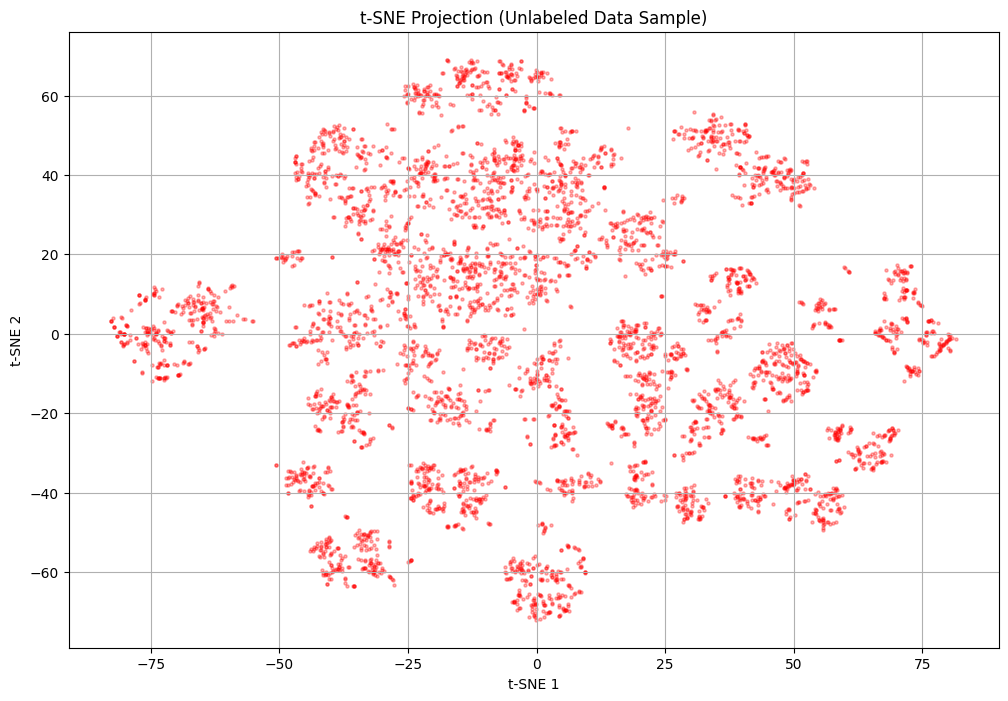

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.3, color='red')
plt.title("t-SNE Projection (Unlabeled Data Sample)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

# Clustering

## K-Means

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
Ks = range(2, 11)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    # Compute silhouette on a sample (to save time) or on full data if feasible
    sil = silhouette_score(X_pca, kmeans.labels_, sample_size=10000, random_state=42)
    sil_scores.append(sil)
    print(f"k={k}, inertia={kmeans.inertia_:.2f}, silhouette={sil:.3f}")


k=2, inertia=7867245.50, silhouette=0.110
k=3, inertia=7441060.50, silhouette=0.114
k=4, inertia=7073115.00, silhouette=0.116
k=5, inertia=6726419.50, silhouette=0.128
k=6, inertia=6484312.00, silhouette=0.134
k=7, inertia=6255561.00, silhouette=0.123
k=8, inertia=6053980.50, silhouette=0.124
k=9, inertia=5854017.00, silhouette=0.130
k=10, inertia=5638895.00, silhouette=0.120


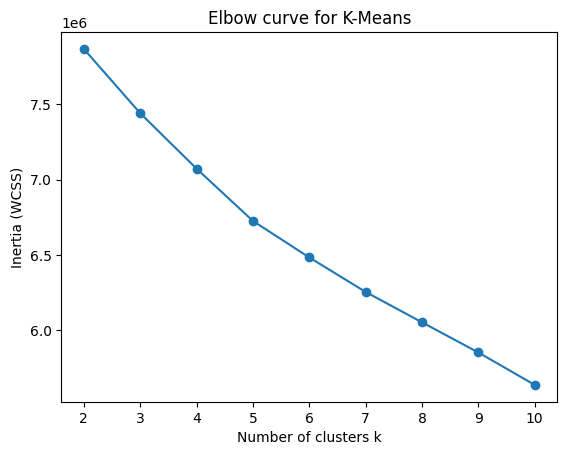

In [27]:
plt.figure()
plt.plot(Ks, inertias, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow curve for K-Means')
plt.show()

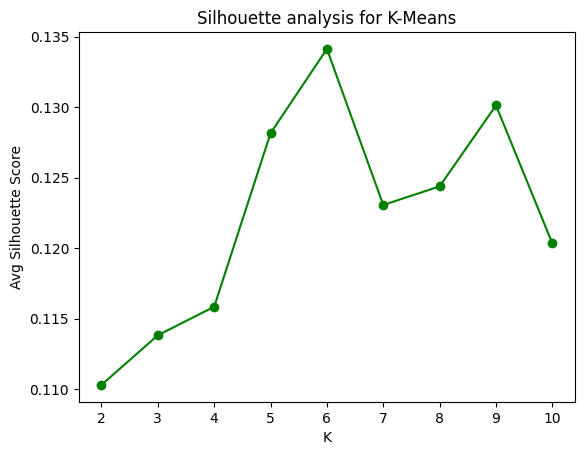

In [28]:
#use x tick 1 - 10

plt.figure()
plt.plot(Ks, sil_scores, marker='o', c='green')
plt.xlabel('K')
plt.ylabel('Avg Silhouette Score')
plt.title('Silhouette analysis for K-Means')
plt.xticks(Ks)
plt.show()


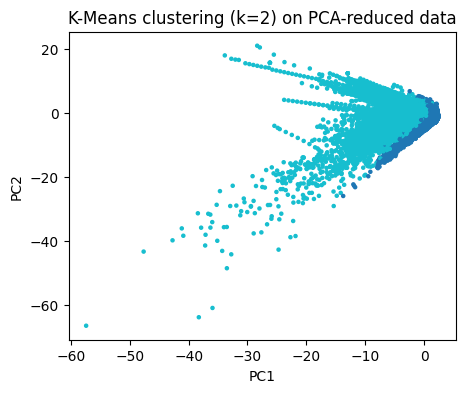

k=2 cluster sizes: {np.int32(0): np.int64(134877), np.int32(1): np.int64(149930)}


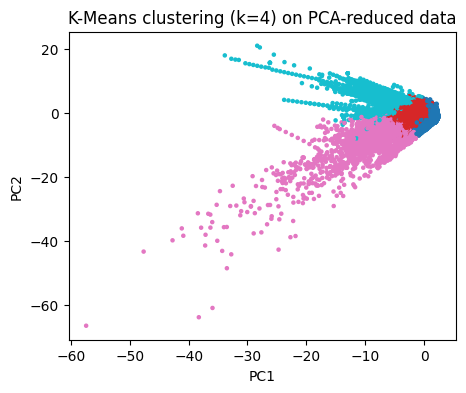

k=4 cluster sizes: {np.int32(0): np.int64(134051), np.int32(1): np.int64(140450), np.int32(2): np.int64(4088), np.int32(3): np.int64(6218)}


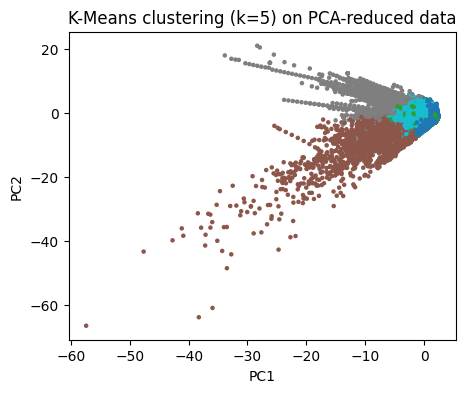

k=5 cluster sizes: {np.int32(0): np.int64(126377), np.int32(1): np.int64(16916), np.int32(2): np.int64(3840), np.int32(3): np.int64(5875), np.int32(4): np.int64(131799)}


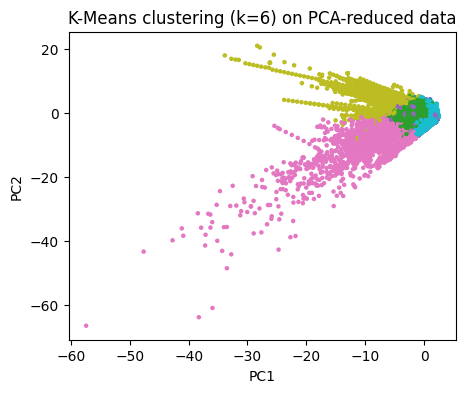

k=6 cluster sizes: {np.int32(0): np.int64(18482), np.int32(1): np.int64(122584), np.int32(2): np.int64(16912), np.int32(3): np.int64(3708), np.int32(4): np.int64(5623), np.int32(5): np.int64(117498)}


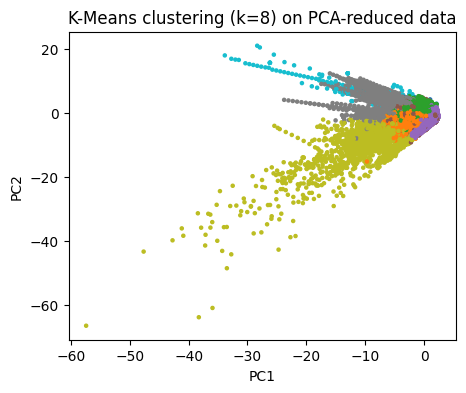

k=8 cluster sizes: {np.int32(0): np.int64(18422), np.int32(1): np.int64(44399), np.int32(2): np.int64(80481), np.int32(3): np.int64(115875), np.int32(4): np.int64(16902), np.int32(5): np.int64(5906), np.int32(6): np.int64(2600), np.int32(7): np.int64(222)}


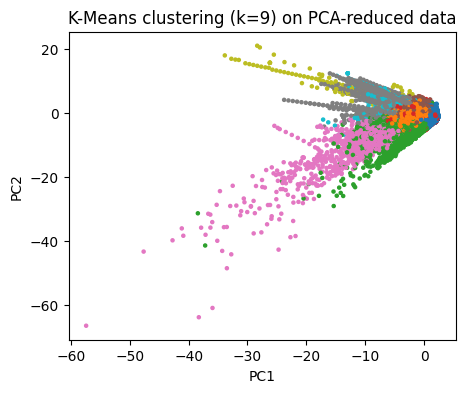

k=9 cluster sizes: {np.int32(0): np.int64(119965), np.int32(1): np.int64(91449), np.int32(2): np.int64(6166), np.int32(3): np.int64(16685), np.int32(4): np.int64(41916), np.int32(5): np.int64(1628), np.int32(6): np.int64(4956), np.int32(7): np.int64(216), np.int32(8): np.int64(1826)}


In [29]:
import numpy as np

for k in [2, 4, 5, 6, 8, 9]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    # Use PCA 2D for visualization
    plt.figure(figsize=(5,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=5)
    plt.title(f'K-Means clustering (k={k}) on PCA-reduced data')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.show()
    # Optionally, print cluster sizes:
    unique, counts = np.unique(labels, return_counts=True)
    print(f"k={k} cluster sizes:", dict(zip(unique, counts)))


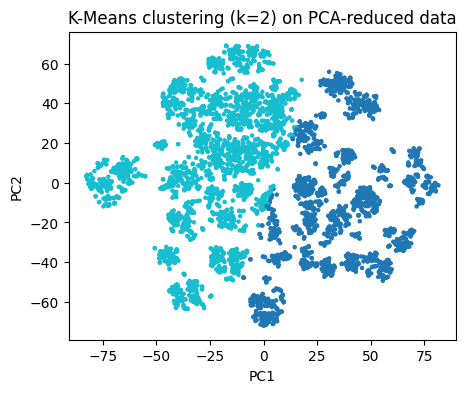

k=2 cluster sizes: {np.int32(0): np.int64(2137), np.int32(1): np.int64(2863)}


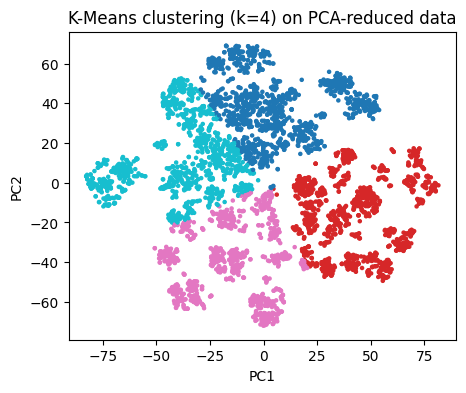

k=4 cluster sizes: {np.int32(0): np.int64(1347), np.int32(1): np.int64(1377), np.int32(2): np.int64(1057), np.int32(3): np.int64(1219)}


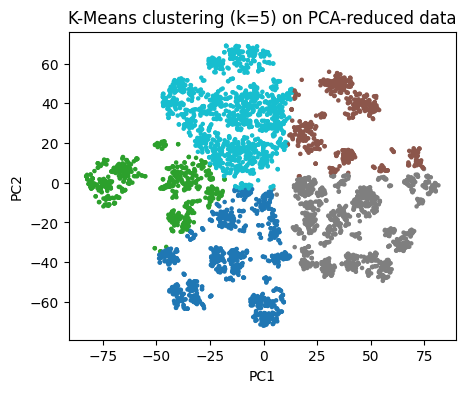

k=5 cluster sizes: {np.int32(0): np.int64(1022), np.int32(1): np.int64(670), np.int32(2): np.int64(598), np.int32(3): np.int64(1213), np.int32(4): np.int64(1497)}


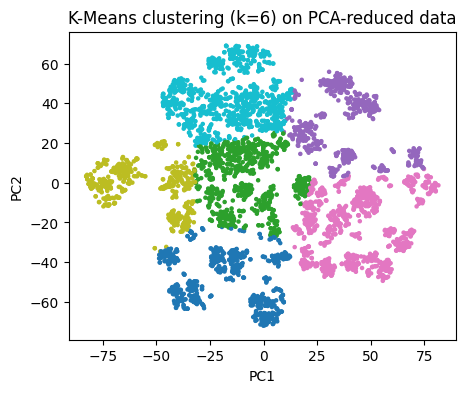

k=6 cluster sizes: {np.int32(0): np.int64(768), np.int32(1): np.int64(862), np.int32(2): np.int64(607), np.int32(3): np.int64(1118), np.int32(4): np.int64(563), np.int32(5): np.int64(1082)}


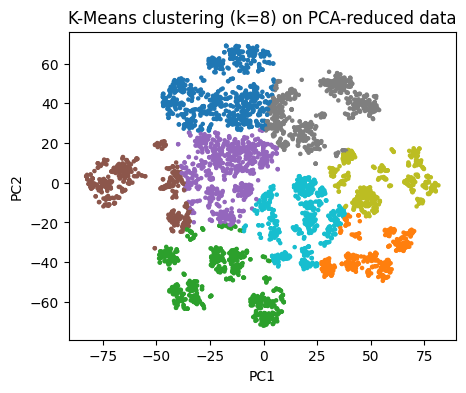

k=8 cluster sizes: {np.int32(0): np.int64(863), np.int32(1): np.int64(431), np.int32(2): np.int64(717), np.int32(3): np.int64(739), np.int32(4): np.int64(493), np.int32(5): np.int64(609), np.int32(6): np.int64(510), np.int32(7): np.int64(638)}


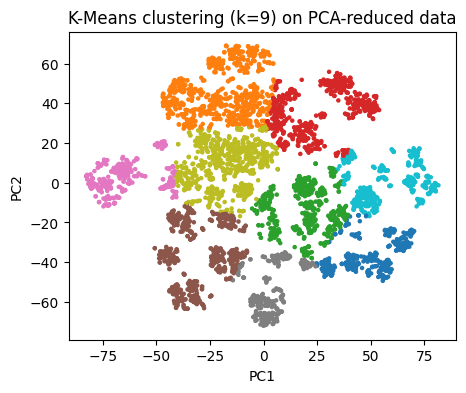

k=9 cluster sizes: {np.int32(0): np.int64(430), np.int32(1): np.int64(843), np.int32(2): np.int64(591), np.int32(3): np.int64(612), np.int32(4): np.int64(658), np.int32(5): np.int64(367), np.int32(6): np.int64(318), np.int32(7): np.int64(721), np.int32(8): np.int64(460)}


In [30]:
import numpy as np

for k in [2, 4, 5, 6, 8, 9]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    # Use PCA 2D for visualization
    plt.figure(figsize=(5,4))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10', s=5)
    plt.title(f'K-Means clustering (k={k}) on PCA-reduced data')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.show()
    # Optionally, print cluster sizes:
    unique, counts = np.unique(labels, return_counts=True)
    print(f"k={k} cluster sizes:", dict(zip(unique, counts)))


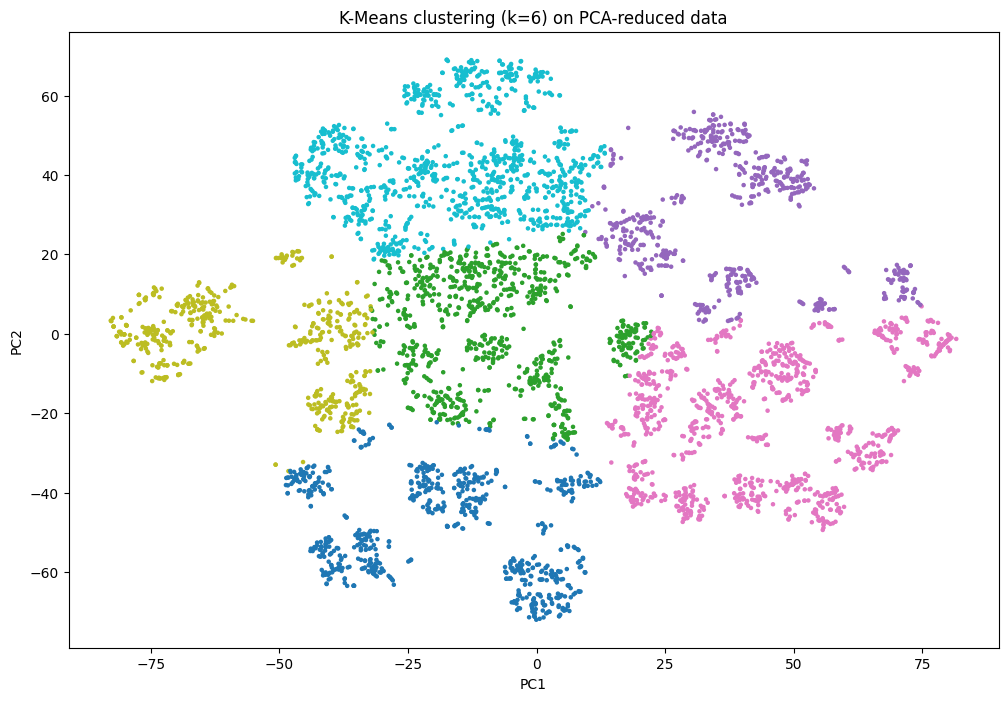

k=6 cluster sizes: {np.int32(0): np.int64(768), np.int32(1): np.int64(862), np.int32(2): np.int64(607), np.int32(3): np.int64(1118), np.int32(4): np.int64(563), np.int32(5): np.int64(1082)}


In [31]:
for k in [6]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    # Use PCA 2D for visualization
    plt.figure(figsize=(12,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10', s=5)
    plt.title(f'K-Means clustering (k={k}) on PCA-reduced data')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.show()
    # Optionally, print cluster sizes:
    unique, counts = np.unique(labels, return_counts=True)
    print(f"k={k} cluster sizes:", dict(zip(unique, counts)))
